In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import os
import json
from collections import defaultdict

from scipy.stats import spearmanr, pearsonr

# Get data for particular sweep

In [66]:
folder = "output/0cd83153"
files = os.listdir(folder)

# Regression fit vs swarm size

In [4]:
corr_files = [f for f in files if "correlations.json" in f and "ntest_50" in f and "samples" not in f and "linear" not in f]
train_corr = defaultdict(list)
test_corr = defaultdict(list)
for file in corr_files:
    print(file)
    seed = int(file.split("seed_")[-1].split("_")[0]) if "seed" in file else 0
    trainsplit = float(file.split("trainsplit_")[-1].split("_")[0]) if "trainsplit" in file else 1.0

    with open(f"{folder}/{file}") as f:
        data = json.load(f)

    train_corr[trainsplit].append(data["train"])
    test_corr[trainsplit].append(data["test"])


avg_mmlu_bpb_trainsplit_0.2_ntest_50_seed_1_correlations.json
avg_mmlu_bpb_trainsplit_0.4_ntest_50_seed_2_correlations.json
avg_mmlu_bpb_trainsplit_0.8_ntest_50_seed_4_correlations.json
avg_mmlu_bpb_ntest_50_seed_3_correlations.json
avg_mmlu_bpb_trainsplit_0.2_ntest_50_correlations.json
avg_mmlu_bpb_trainsplit_0.1_ntest_50_correlations.json
avg_mmlu_bpb_trainsplit_0.7_ntest_50_seed_1_correlations.json
avg_mmlu_bpb_trainsplit_0.8_ntest_50_seed_3_correlations.json
avg_mmlu_bpb_trainsplit_0.9_ntest_50_seed_1_correlations.json
avg_mmlu_bpb_ntest_50_seed_4_correlations.json
avg_mmlu_bpb_trainsplit_0.1_ntest_50_seed_2_correlations.json
avg_mmlu_bpb_trainsplit_0.4_ntest_50_correlations.json
avg_mmlu_bpb_ntest_50_seed_1_correlations.json
avg_mmlu_bpb_trainsplit_0.2_ntest_50_seed_2_correlations.json
avg_mmlu_bpb_trainsplit_0.5_ntest_50_seed_1_correlations.json
avg_mmlu_bpb_trainsplit_0.9_ntest_50_seed_2_correlations.json
avg_mmlu_bpb_trainsplit_0.3_ntest_50_seed_3_correlations.json
avg_mmlu_bpb

In [6]:
n_runs = 256 - 50 # hardcoded

train_corr = dict(sorted(train_corr.items()))
test_corr = dict(sorted(test_corr.items()))

avg_train_corr = {k * n_runs: np.mean(v) for k, v in train_corr.items()}
avg_test_corr = {k * n_runs: np.mean(v) for k, v in test_corr.items()}

std_train_corr = {k * n_runs: np.std(v) for k, v in train_corr.items()}
std_test_corr = {k * n_runs: np.std(v) for k, v in test_corr.items()}

In [43]:
avg_train_corr

{20.6: nan,
 41.2: nan,
 61.8: 0.8072944434569367,
 82.4: 0.9374775759862717,
 103.0: 0.9809542734609131,
 123.6: 0.9908817181134404,
 144.2: 0.9949367652615724,
 164.8: 0.996148366775574,
 185.4: 0.9970956502762196,
 206.0: 0.9982227886725792}

Text(0.5, 1.0, 'Regression fit on train/test mixtures vs num training runs')

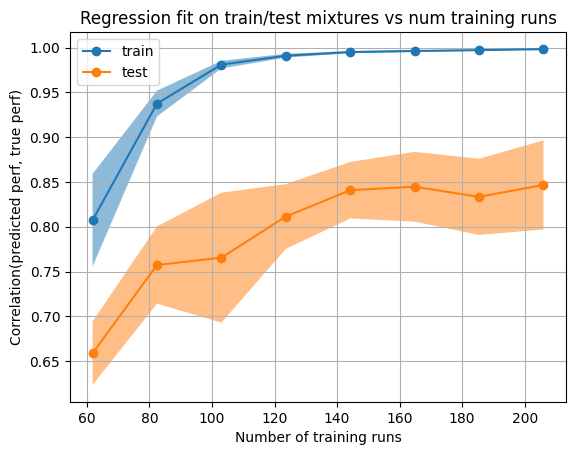

In [15]:

plt.plot(list(avg_train_corr.keys()), list(avg_train_corr.values()), label="train", marker="o")
plt.plot(list(avg_test_corr.keys()), list(avg_test_corr.values()), label="test", marker="o")
plt.fill_between(list(avg_train_corr.keys()), np.array(list(avg_train_corr.values())) - np.array(list(std_train_corr.values())), np.array(list(avg_train_corr.values())) + np.array(list(std_train_corr.values())), alpha=0.5)
plt.fill_between(list(avg_test_corr.keys()), np.array(list(avg_test_corr.values())) - np.array(list(std_test_corr.values())), np.array(list(avg_test_corr.values())) + np.array(list(std_test_corr.values())), alpha=0.5)
plt.legend()
plt.grid()
plt.xlabel("Number of training runs")
plt.ylabel("Correlation(predicted perf, true perf)")

plt.title("Regression fit on train/test mixtures vs num training runs")

# Proposed weights vs swarm size

In [8]:
weight_files = [f for f in files if "optimal.json" in f and "ntest_50" in f and "samples" not in f and "linear" not in f]

In [9]:
all_weights = defaultdict(list)

for file in weight_files:
    seed = int(file.split("seed_")[-1].split("_")[0]) if "seed" in file else 0
    print(file)

    trainsplit = float(file.split("trainsplit_")[-1].split("_")[0]) if "trainsplit" in file else 1.0

    with open(f"{folder}/{file}") as f:
        data = json.load(f)

    weights = np.array([domain['weight'] for domain in data])
    all_weights[trainsplit].append(weights)

avg_mmlu_bpb_trainsplit_0.8_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.6_ntest_50_optimal.json
avg_mmlu_bpb_trainsplit_0.5_ntest_50_seed_2_optimal.json
avg_mmlu_bpb_trainsplit_0.1_ntest_50_seed_3_optimal.json
avg_mmlu_bpb_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.7_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.1_ntest_50_optimal.json
avg_mmlu_bpb_trainsplit_0.8_ntest_50_optimal.json
avg_mmlu_bpb_trainsplit_0.1_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.2_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.9_ntest_50_optimal.json
avg_mmlu_bpb_trainsplit_0.8_ntest_50_seed_2_optimal.json
avg_mmlu_bpb_trainsplit_0.4_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.5_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_trainsplit_0.3_ntest_50_seed_2_optimal.json
avg_mmlu_bpb_trainsplit_0.2_ntest_50_seed_4_optimal.json
avg_mmlu_bpb_trainsplit_0.5_ntest_50_seed_3_optimal.json
avg_mmlu_bpb_trainsplit_0.9_ntest_50_seed_4_optimal.json
avg_mmlu_bpb_trai

In [10]:
all_weights = dict(sorted(all_weights.items()))

In [11]:
final_weights = all_weights[1.0]

In [12]:
def kl_divergence(p: np.ndarray, q: np.ndarray) -> float:
    """Compute KL divergence D_KL(P || Q) between two probability distributions."""
    # Add a small epsilon to avoid log(0) or divide-by-zero
    epsilon = 1e-12
    p = np.clip(p, epsilon, 1)
    q = np.clip(q, epsilon, 1)
    
    p /= p.sum()
    q /= q.sum()
    
    return np.sum(p * np.log(p / q))


In [47]:
l2 = np.zeros((len(all_weights), len(all_weights)))

for i, (k1, weights1) in enumerate(all_weights.items()):
    for j, (k2, weights2) in enumerate(all_weights.items()):
        l2[i, j] = np.linalg.norm(np.array(weights1) - np.array(weights2))

([<matplotlib.axis.YTick at 0x74e770740050>,
 [Text(0, 0, '0.1'),
  Text(0, 1, '0.2'),
  Text(0, 2, '0.3'),
  Text(0, 3, '0.4'),
  Text(0, 4, '0.5'),
  Text(0, 5, '0.6'),
  Text(0, 6, '0.7'),
  Text(0, 7, '0.8'),
  Text(0, 8, '0.9'),
  Text(0, 9, '1.0')])

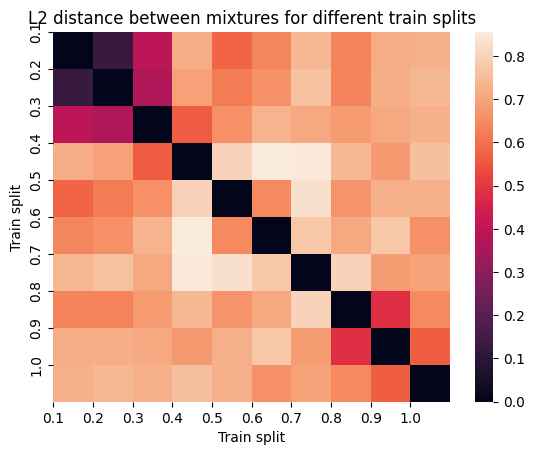

In [60]:
sns.heatmap(l2)
plt.xlabel("Train split")
plt.ylabel("Train split")
plt.title("L2 distance between mixtures for different train splits")

plt.xticks(ticks=np.arange(len(all_weights)), labels=list(all_weights.keys()))
plt.yticks(ticks=np.arange(len(all_weights)), labels=list(all_weights.keys()))

In [57]:
s = np.zeros((len(all_weights), len(all_weights)))

for i, (k1, weights1) in enumerate(all_weights.items()):
    for j, (k2, weights2) in enumerate(all_weights.items()):
        s[i, j] = np.array([spearmanr(weights1[i], weights2[i])[0] for i in range(len(weights1))]).mean()

([<matplotlib.axis.YTick at 0x74e7708551d0>,
 [Text(0, 0, '0.1'),
  Text(0, 1, '0.2'),
  Text(0, 2, '0.3'),
  Text(0, 3, '0.4'),
  Text(0, 4, '0.5'),
  Text(0, 5, '0.6'),
  Text(0, 6, '0.7'),
  Text(0, 7, '0.8'),
  Text(0, 8, '0.9'),
  Text(0, 9, '1.0')])

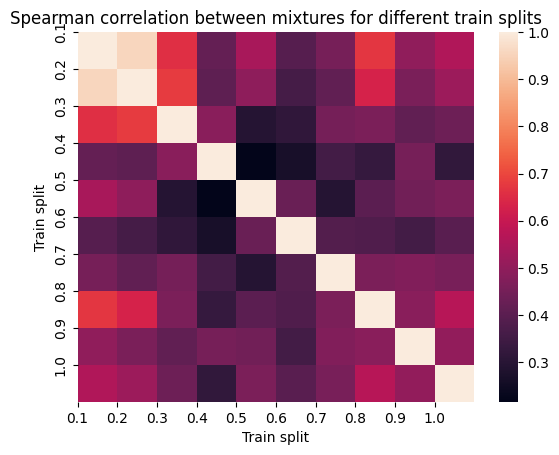

In [59]:
sns.heatmap(s)
plt.xlabel("Train split")
plt.ylabel("Train split")
plt.title("Spearman correlation between mixtures for different train splits")

plt.xticks(ticks=np.arange(len(all_weights)), labels=list(all_weights.keys()))
plt.yticks(ticks=np.arange(len(all_weights)), labels=list(all_weights.keys()))

In [61]:
kl = np.zeros((len(all_weights), len(all_weights)))

for i, (k1, weights1) in enumerate(all_weights.items()):
    for j, (k2, weights2) in enumerate(all_weights.items()):
        kl[i, j] = np.array([kl_divergence(weights1[i], weights2[i]) for i in range(len(weights1))]).mean()

([<matplotlib.axis.YTick at 0x74e7707f7750>,
 [Text(0, 0, '0.1'),
  Text(0, 1, '0.2'),
  Text(0, 2, '0.3'),
  Text(0, 3, '0.4'),
  Text(0, 4, '0.5'),
  Text(0, 5, '0.6'),
  Text(0, 6, '0.7'),
  Text(0, 7, '0.8'),
  Text(0, 8, '0.9'),
  Text(0, 9, '1.0')])

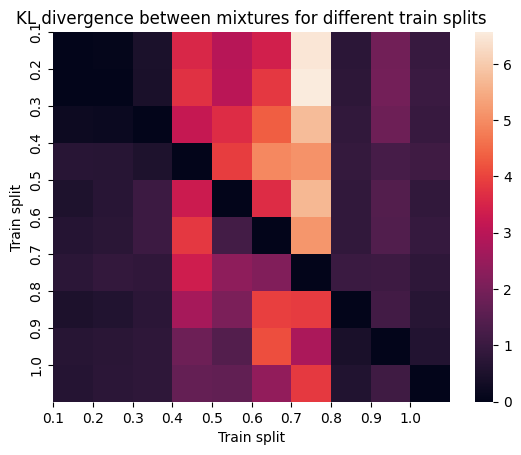

In [62]:
sns.heatmap(kl)
plt.xlabel("Train split")
plt.ylabel("Train split")
plt.title("KL divergence between mixtures for different train splits")

plt.xticks(ticks=np.arange(len(all_weights)), labels=list(all_weights.keys()))
plt.yticks(ticks=np.arange(len(all_weights)), labels=list(all_weights.keys()))

In [22]:
kl_to_final = defaultdict(list)
l2_to_final = defaultdict(list)
spearman_vs_final = defaultdict(list)

for k, weights in all_weights.items():
    for i, weights_per_seed in enumerate(weights):
        kl_to_final[k].append(kl_divergence(final_weights[i], weights_per_seed)) #
        l2_to_final[k].append(np.linalg.norm(final_weights[i] - weights_per_seed) )
        spearman_vs_final[k].append(spearmanr(final_weights[i], weights_per_seed)[0])

kl_to_final = dict(sorted(kl_to_final.items()))
avg_kl_to_final = {k: np.mean(v) for k, v in kl_to_final.items()}
std_kl_to_final = {k: np.std(v) for k, v in kl_to_final.items()}

l2_to_final = dict(sorted(l2_to_final.items()))
avg_l2_to_final = {k: np.mean(v) for k, v in l2_to_final.items()}
std_l2_to_final = {k: np.std(v) for k, v in l2_to_final.items()}


spearman_vs_final = dict(sorted(spearman_vs_final.items()))
avg_spearman_vs_final = {k: np.mean(v) for k, v in spearman_vs_final.items()}
std_spearman_vs_final = {k: np.std(v) for k, v in spearman_vs_final.items()}


Text(0.5, 1.0, 'KL divergence to final weights vs training split')

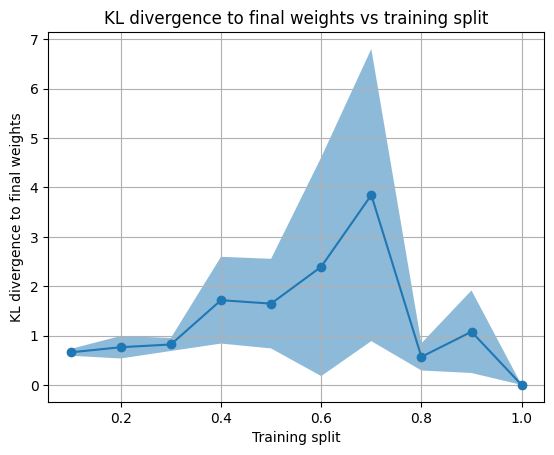

In [23]:
plt.plot(list(avg_kl_to_final.keys()), list(avg_kl_to_final.values()), label="KL divergence", marker="o")
plt.fill_between(list(avg_kl_to_final.keys()), np.array(list(avg_kl_to_final.values())) - np.array(list(std_kl_to_final.values())), np.array(list(avg_kl_to_final.values())) + np.array(list(std_kl_to_final.values())), alpha=0.5)
plt.grid()
plt.xlabel("Training split")
plt.ylabel("KL divergence to final weights")
plt.title("KL divergence to final weights vs training split")

Text(0.5, 1.0, 'L2 distance to final weights vs training split')

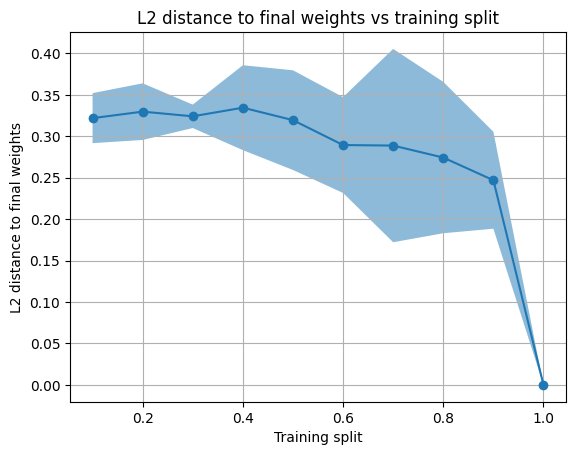

In [24]:
plt.plot(list(avg_l2_to_final.keys()), list(avg_l2_to_final.values()), label="L2 distance", marker="o")
plt.fill_between(list(avg_l2_to_final.keys()), np.array(list(avg_l2_to_final.values())) - np.array(list(std_l2_to_final.values())), np.array(list(avg_l2_to_final.values())) + np.array(list(std_l2_to_final.values())), alpha=0.5)
plt.grid()
plt.xlabel("Training split")
plt.ylabel("L2 distance to final weights")
plt.title("L2 distance to final weights vs training split")

Text(0.5, 1.0, 'Spearman correlation to final weights vs training split')

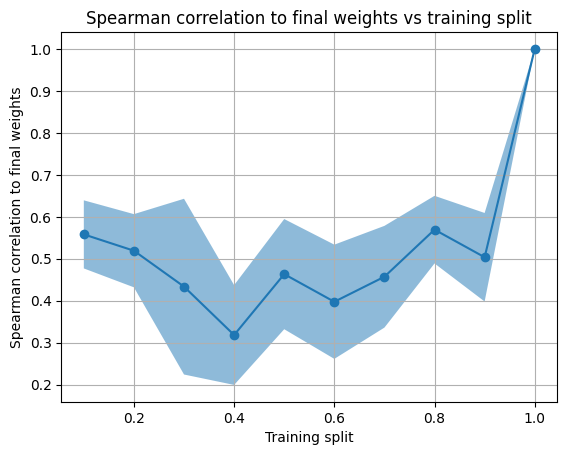

In [25]:
plt.plot(list(avg_spearman_vs_final.keys()), list(avg_spearman_vs_final.values()), label="L2 distance", marker="o")
plt.fill_between(list(avg_spearman_vs_final.keys()), np.array(list(avg_spearman_vs_final.values())) - np.array(list(std_spearman_vs_final.values())), np.array(list(avg_spearman_vs_final.values())) + np.array(list(std_spearman_vs_final.values())), alpha=0.5)
plt.grid()
plt.xlabel("Training split")
plt.ylabel("Spearman correlation to final weights")
plt.title("Spearman correlation to final weights vs training split")

# Proposed weights vs seed

In [67]:
files

['avg_mmlu_bpb_trainsplit_0.6_ntest_50_seed_3_fit.png',
 'avg_mmlu_bpb_trainsplit_0.8_ntest_50_seed_1_optimal.json',
 'avg_mmlu_bpb_trainsplit_0.6_ntest_50_optimal.json',
 'avg_mmlu_bpb_trainsplit_0.5_ntest_50_seed_2_optimal.json',
 'avg_mmlu_bpb_seed_1_optimal.png',
 'avg_mmlu_bpb_seed_4_fit.png',
 'avg_mmlu_bpb_trainsplit_0.1_ntest_50_seed_3_optimal.json',
 'avg_mmlu_bpb_seed_2_optimal.png',
 'avg_mmlu_bpb_ntest_50_seed_1_optimal.json',
 'avg_mmlu_bpb_trainsplit_0.9_ntest_50_seed_2_fit.png',
 'avg_mmlu_bpb_trainsplit_0.4_ntest_50_seed_4_optimal.png',
 'avg_mmlu_bpb_trainsplit_0.4_ntest_50_seed_2_optimal.png',
 'avg_mmlu_bpb_trainsplit_0.6_ntest_50_seed_4_fit.png',
 'avg_mmlu_bpb_trainsplit_0.1_ntest_50_fit.png',
 'avg_mmlu_bpb_optimal.png',
 'avg_mmlu_bpb_trainsplit_0.2_ntest_50_seed_1_correlations.json',
 'avg_mmlu_bpb_trainsplit_0.2_ntest_50_seed_4_fit.png',
 'avg_mmlu_bpb_seed_2_correlations.json',
 'avg_mmlu_bpb_trainsplit_0.1_ntest_50_seed_2_fit.png',
 'avg_mmlu_bpb_ntest_50_see

In [84]:
seed_files = [f for f in files if "linear" not in f and "optimal.json" in f and "ntest_50" in f and "trainsplit" not in f and "samples" not in f]
seed_files = sorted(seed_files)
seed_files

['avg_mmlu_bpb_ntest_50_optimal.json',
 'avg_mmlu_bpb_ntest_50_seed_1_optimal.json',
 'avg_mmlu_bpb_ntest_50_seed_2_optimal.json',
 'avg_mmlu_bpb_ntest_50_seed_3_optimal.json',
 'avg_mmlu_bpb_ntest_50_seed_4_optimal.json']

In [85]:
seed_weights = []

for file in seed_files:
    seed = int(file.split("seed_")[-1].split("_")[0]) if "seed" in file else 0
    trainsplit = float(file.split("trainsplit_")[-1].split("_")[0]) if "trainsplit" in file else 1.0

    with open(f"{folder}/{file}") as f:
        print(file)
        data = json.load(f)

    weights = np.array([domain['weight'] for domain in data])
    seed_weights.append(weights)

avg_mmlu_bpb_ntest_50_optimal.json
avg_mmlu_bpb_ntest_50_seed_1_optimal.json
avg_mmlu_bpb_ntest_50_seed_2_optimal.json
avg_mmlu_bpb_ntest_50_seed_3_optimal.json
avg_mmlu_bpb_ntest_50_seed_4_optimal.json


In [88]:
l2_seed = np.zeros((len(seed_weights), len(seed_weights)))

for i, weights1 in enumerate(seed_weights):
    for j, weights2 in enumerate(seed_weights):
        l2_seed[i, j] = np.linalg.norm(np.array(weights1) - np.array(weights2))

Text(0.5, 1.0, 'L2 distance between mixtures for different seeds (206 runs each)')

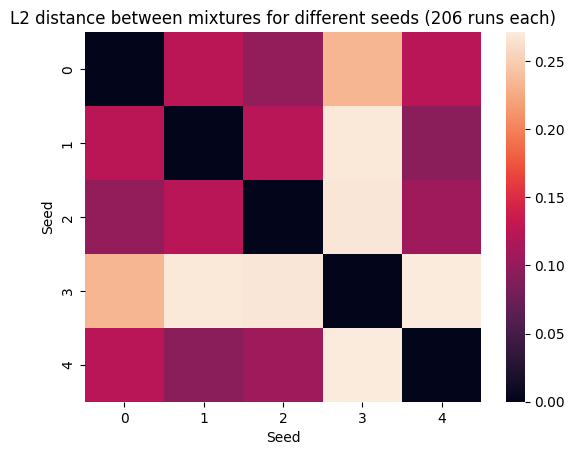

In [91]:
sns.heatmap(l2_seed)
plt.xlabel("Seed")
plt.ylabel("Seed")
plt.title("L2 distance between mixtures for different seeds (206 runs each)")

#plt.xticks(ticks=np.arange(len(seed_weights)), labels=list(seed_weights.keys()))
#plt.yticks(ticks=np.arange(len(seed_weights)), labels=list(seed_weights.keys()))

In [93]:
spearman_seed = np.zeros((len(seed_weights), len(seed_weights)))

for i, weights1 in enumerate(seed_weights):
    for j, weights2 in enumerate(seed_weights):
        spearman_seed[i, j] = spearmanr(weights1, weights2)[0]

Text(0.5, 1.0, 'Spearman correlation between mixtures for different seeds (206 runs each)')

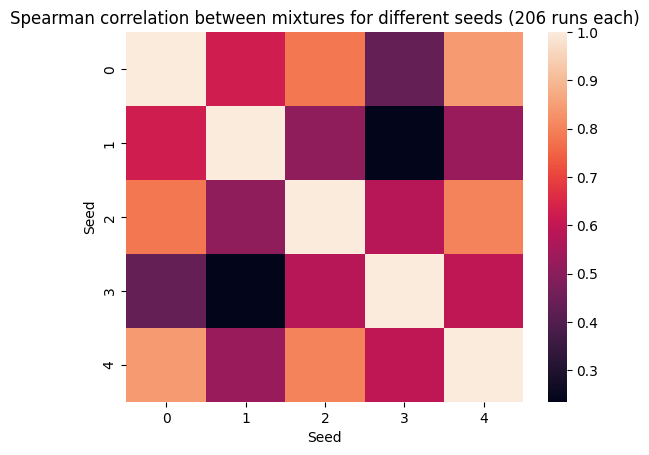

In [94]:
sns.heatmap(spearman_seed)
plt.xlabel("Seed")
plt.ylabel("Seed")
plt.title("Spearman correlation between mixtures for different seeds (206 runs each)")

#plt.xticks(ticks=np.arange(len(seed_weights)), labels=list(seed_weights.keys()))
#plt.yticks(ticks=np.arange(len(seed_weights)), labels=list(seed_weights.keys()))

In [28]:
prior = {  'sports_and_fitness': 0.03447091779494002,
        'entertainment': 0.0955190139258887,
        'art_and_design': 0.017081738233572036,
        'history_and_geography': 0.0275961653769541,
        'social_life': 0.04446512635616997,
        'food_and_dining': 0.02035551922831945,
        'religion': 0.04007973259239869,
        'industrial': 0.010613101257834304,
        'science_math_and_technology': 0.0683212170931499,
        'games': 0.05123400064584381,
        'transportation': 0.026818278906890928,
        'education_and_jobs': 0.03827413448798185,
        'software': 0.02535095739921156,
        'literature': 0.05395890693403475,
        'politics': 0.09838604386996727,
        'health': 0.09990022316708945,
        'software_development': 0.049591518503015485,
        'crime_and_law': 0.037491046613335535,
        'adult_content': 0.011534124540863807,
        'fashion_and_beauty': 0.00925392805107652,
        'home_and_hobbies': 0.03469981793514831,
        'finance_and_business': 0.06583097917161254,
        'travel_and_tourism': 0.016720794965028284,
        'electronics_and_hardware': 0.022452712949672732
    }


In [31]:
prior = dict(sorted(prior.items()))

In [33]:
1/len(prior.keys())

0.041666666666666664

In [113]:
prior =    {'electronics_and_hardware': 0.02252846927808186,
    'travel_and_tourism': 0.01667626901270792,
    'religion': 0.04030199076983852,
    'food_and_dining': 0.020291659593193807,
    'home_and_hobbies': 0.034621890011029464,
    'politics': 0.09838421860766539,
    'software_development': 0.04835767747466825,
    'industrial': 0.010640504851475604,
    'literature': 0.05367136256765137,
    'history_and_geography': 0.028007795295185975,
    'sports_and_fitness': 0.03455368961865927,
    'health': 0.10085821548021548,
    'crime_and_law': 0.03760251381333424,
    'education_and_jobs': 0.03819063764260111,
    'software': 0.025134154331657502,
    'transportation': 0.02686612455867175,
    'entertainment': 0.09499472729589659,
    'social_life': 0.04443687756758139,
    'adult_content': 0.011426145559378242,
    'science_math_and_technology': 0.06933979163830614,
    'fashion_and_beauty': 0.009181677850877463,
    'finance_and_business': 0.06572786800235751,
    'games': 0.0510904592313224,
    'art_and_design': 0.017115279947642753}
prior = dict(sorted(prior.items()))

In [116]:
1/len(prior)

0.041666666666666664

# The effect of fitting over last 1 or 2 samples (versus 10)

In [95]:
sample_files_1 = [f for f in files if "1_samples_correlations.json" in f]
sample_files_1

In [96]:
sample_files_2 = [f for f in files if "2_samples_correlations.json" in f]
sample_files_2

In [105]:
sample_files_10 = [f for f in files if "correlations.json" in f and "ntest" in f and "linear" not in f and "trainsplit" not in f and "samples" not in f]
sample_files_10

['avg_mmlu_bpb_ntest_50_seed_3_correlations.json',
 'avg_mmlu_bpb_ntest_50_seed_4_correlations.json',
 'avg_mmlu_bpb_ntest_50_seed_1_correlations.json',
 'avg_mmlu_bpb_ntest_50_seed_2_correlations.json',
 'avg_mmlu_bpb_ntest_50_correlations.json']

In [112]:
avg_train_1 = []
avg_test_1 = []
avg_train_2 = []
avg_test_2 = []
avg_train_10 = []
avg_test_10 = []

for file in sample_files_1:
    with open(f"{folder}/{file}") as f:
        data = json.load(f)
    avg_train_1.append(data["train"])
    avg_test_1.append(data["test"])

for file in sample_files_2:
    with open(f"{folder}/{file}") as f:
        data = json.load(f)
    avg_train_2.append(data["train"])
    avg_test_2.append(data["test"])

for file in sample_files_10:
    with open(f"{folder}/{file}") as f:
        data = json.load(f)
    avg_train_10.append(data["train"])
    avg_test_10.append(data["test"])


print(avg_test_1)
print(avg_test_2)
print(avg_test_10)
avg_train_1 = np.mean(np.array(avg_train_1))
avg_test_1 = np.mean(np.array(avg_test_1))
avg_train_2 = np.mean(np.array(avg_train_2))
avg_test_2 = np.mean(np.array(avg_test_2))
avg_train_10 = np.mean(np.array(avg_train_10))
avg_test_10 = np.mean(np.array(avg_test_10))

[0.913255021945102, 0.9068741198618618, 0.9130036924286976, 0.8707072034326792, 0.9376834918931609]
[0.9337331542209376, 0.8464323356887492, 0.894840344822417, 0.9130893456712588, 0.9006517916703687]
[0.7543622639003377, 0.872779717035113, 0.8784335011349675, 0.8918495851419498, 0.8361610674303739]


In [108]:
avg_train_1, avg_test_1

(0.9985944712713118, 0.9083047059123002)

In [109]:
avg_train_2, avg_test_2

(0.9986612845125148, 0.8977493944147461)

In [110]:
avg_train_10, avg_test_10

(0.9982227886725792, 0.8467172269285484)